In [1]:
import pandas as pd
import numpy as np


In [2]:
# taken from imigrant conjoint data
df = pd.read_csv('candidate.tab', delimiter='\t')
df

,resID,atmilitary,atreligion,ated,atprof,atinc,atrace,atage,atmale,selected,rating
0,383,1,6,3,6,6,1,6,2,0,0.333333
1,383,2,1,1,4,3,6,4,1,1,0.500000
2,383,1,3,5,5,1,2,5,2,1,0.666667
3,383,2,4,5,3,2,1,6,1,0,0.666667
4,383,2,1,2,3,6,2,2,2,0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
3461,72,2,3,3,1,1,3,4,1,0,0.500000
3462,72,1,2,6,3,2,5,4,1,0,0.500000
3463,72,2,4,4,3,3,1,2,1,1,0.500000
3464,72,2,6,3,1,5,4,2,1,1,0.500000


In [6]:
len(df['resID'].unique())

311

In [12]:
# df.loc[df['resID']==383,:]

In [13]:
df.head()

,resID,atmilitary,atreligion,ated,atprof,atinc,atrace,atage,atmale,selected,rating
0,383,1,6,3,6,6,1,6,2,0,0.333333
1,383,2,1,1,4,3,6,4,1,1,0.500000
2,383,1,3,5,5,1,2,5,2,1,0.666667
3,383,2,4,5,3,2,1,6,1,0,0.666667
4,383,2,1,2,3,6,2,2,2,0,0.333333


In [14]:
# checking for empty data
df.isnull().sum()

resID          0
atmilitary     0
atreligion     0
ated           0
atprof         0
atinc          0
atrace         0
atage          0
atmale         0
selected       0
rating        10
dtype: int64

In [15]:
# remove empty data
clean_df = df[~df.rating.isnull()]

In [64]:
# y

In [16]:

y = clean_df['selected']
x = clean_df[[x for x in df.columns if x != 'selected' and x != 'resID' and x != 'rating']]



In [26]:
xdum = pd.get_dummies(x, columns=[c for c in x.columns if c != 'selected'], drop_first=True)
xdum.head()

,atmilitary_2,atreligion_2,atreligion_3,atreligion_4,atreligion_5,atreligion_6,ated_2,ated_3,ated_4,ated_5,...,atrace_3,atrace_4,atrace_5,atrace_6,atage_2,atage_3,atage_4,atage_5,atage_6,atmale_2
0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [21]:
xdum = sm.add_constant(xdum) 

In [22]:
xdum

,const,atmilitary_2,atreligion_2,atreligion_3,atreligion_4,atreligion_5,atreligion_6,ated_2,ated_3,ated_4,...,atrace_3,atrace_4,atrace_5,atrace_6,atage_2,atage_3,atage_4,atage_5,atage_6,atmale_2
0,1.0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,1
1,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,1.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1.0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3461,1.0,1,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3462,1.0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3463,1.0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3464,1.0,1,0,0,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0


In [19]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [27]:
res = sm.OLS(y, xdum, family=sm.families.Binomial()).fit()
res.summary()


/home/xenakas/.local/lib/python3.10/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               selected   R-squared (uncentered):                   0.536
Model:                            OLS   Adj. R-squared (uncentered):              0.531
Method:                 Least Squares   F-statistic:                              123.4
Date:                Mon, 06 Mar 2023   Prob (F-statistic):                        0.00
Time:                        15:38:11   Log-Likelihood:                         -2379.5
No. Observations:                3456   AIC:                                      4823.
Df Residuals:                    3424   BIC:                                      5020.
Df Model:                          32                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
atmilitary_2     0.1108      0.016      6.810      0.000       0.079       0.143
atreligion_2     0.0338      0.027      1.237      0.216      -0.020       0.087
atreligion_3     0.0528      0.027      1.934      0.053      -0.001       0.106
atreligion_4     0.0552      0.027      2.016      0.044       0.002       0.109
atreligion_5    -0.0480      0.027     -1.746      0.081      -0.102       0.006
atreligion_6    -0.0652      0.027     -2.396      0.017      -0.118      -0.012
ated_2           0.2119      0.028      7.558      0.000       0.157       0.267
ated_3           0.2239      0.028      8.053      0.000       0.169       0.278
ated_4           0.2590      0.027      9.546      0.000       0.206       0.312
ated_5           0.2525      0.027      9.279      0.000       0.199       0.306
ated_6           0.3409      0.027     12.771      0.000       0.289       0.393
atprof_2         0.0491      0.028      1.783      0.075      -0.005       0.103
atprof_3         0.0601      0.027      2.244      0.025       0.008       0.113
atprof_4         0.0354      0.027      1.315      0.189      -0.017       0.088
atprof_5        -0.0180      0.027     -0.654      0.513      -0.072       0.036
atprof_6        -0.1488      0.027     -5.491      0.000      -0.202      -0.096
atinc_2          0.0912      0.028      3.263      0.001       0.036       0.146
atinc_3          0.1330      0.027      4.988      0.000       0.081       0.185
atinc_4          0.0959      0.027      3.490      0.000       0.042       0.150
atinc_5          0.1430      0.027      5.303      0.000       0.090       0.196
atinc_6          0.0760      0.027      2.777      0.006       0.022       0.130
atrace_2         0.0997      0.027      3.654      0.000       0.046       0.153
atrace_3         0.1114      0.027      4.168      0.000       0.059       0.164
atrace_4         0.0486      0.028      1.749      0.080      -0.006       0.103
atrace_5         0.0788      0.027      2.903      0.004       0.026       0.132
atrace_6         0.1171      0.027      4.268      0.000       0.063       0.171
atage_2          0.0995      0.028      3.612      0.000       0.045       0.153
atage_3          0.0941      0.027      3.505      0.000       0.041       0.147
atage_4          0.0766      0.027      2.811      0.005       0.023       0.130
atage_5          0.0065      0.027      0.243      0.808      -0.046       0.059
atage_6         -0.0752      0.027     -2.776      0.006      -0.128      -0.022
atmale_2         0.0285      0.016      1.758      0.079      -0.003       0.060
==============================================================================
Omnibus:                    19285.257   Durbin-Watson:                

In [28]:
df_res = pd.DataFrame({
    'param_name': res.params.keys()
    , 'param_w': res.params.values
    , 'pval': res.pvalues
})
# adding field for absolute of parameters
df_res['abs_param_w'] = np.abs(df_res['param_w'])
# marking field is significant under 95% confidence interval
df_res['is_sig_95'] = (df_res['pval'] < 0.05)
# constructing color naming for each param
df_res['c'] = ['blue' if x else 'red' for x in df_res['is_sig_95']]

# make it sorted by abs of parameter value
df_res = df_res.sort_values(by='abs_param_w', ascending=True)


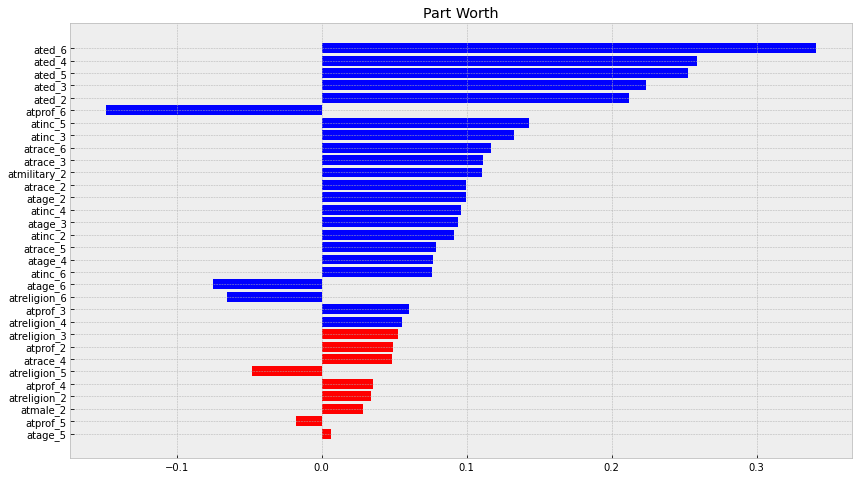

In [29]:
f, ax = plt.subplots(figsize=(14, 8))
plt.title('Part Worth')
pwu = df_res['param_w']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_res['c'])
plt.yticks(xbar, labels=df_res['param_name'])
plt.show()


In [30]:
# need to assemble per attribute for every level of that attribute in dicionary
range_per_feature = dict()
for key, coeff in res.params.items():
    sk =  key.split('_')
    feature = sk[0]
    if len(sk) == 1:
        feature = key
    if feature not in range_per_feature:
        range_per_feature[feature] = list()
        
    range_per_feature[feature].append(coeff)


In [31]:
# importance per feature is range of coef in a feature
# while range is simply max(x) - min(x)
importance_per_feature = {
    k: max(v) - min(v) for k, v in range_per_feature.items()
}

# compute relative importance per feature
# or normalized feature importance by dividing 
# sum of importance for all features
total_feature_importance = sum(importance_per_feature.values())
relative_importance_per_feature = {
    k: 100 * round(v/total_feature_importance, 3) for k, v in importance_per_feature.items()
}


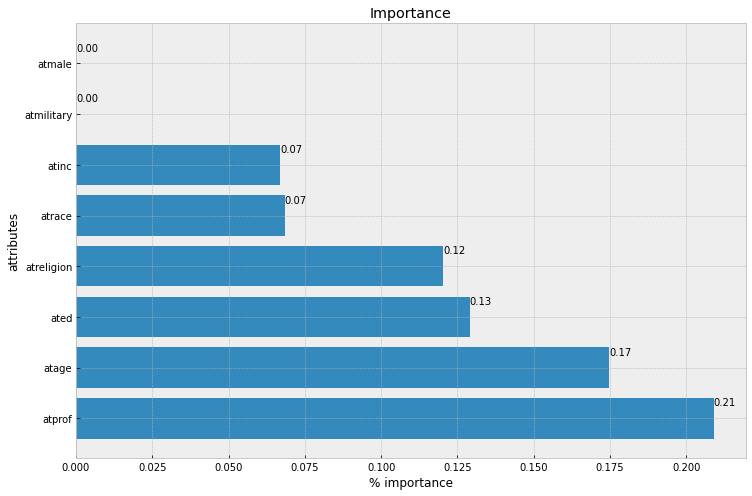

In [32]:
alt_data = pd.DataFrame(
    list(importance_per_feature.items()), 
    columns=['attr', 'importance']
).sort_values(by='importance', ascending=False)


f, ax = plt.subplots(figsize=(12, 8))
xbar = np.arange(len(alt_data['attr']))
plt.title('Importance')
plt.barh(xbar, alt_data['importance'])
for i, v in enumerate(alt_data['importance']):
    ax.text(v , i + .25, '{:.2f}'.format(v))
plt.ylabel('attributes')
plt.xlabel('% importance')
plt.yticks(xbar, alt_data['attr'])
plt.show()


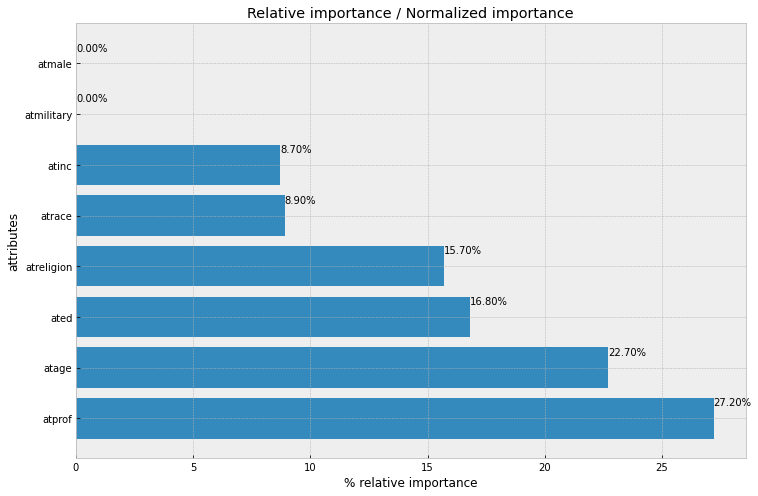

In [33]:
alt_data = pd.DataFrame(
    list(relative_importance_per_feature.items()), 
    columns=['attr', 'relative_importance (pct)']
).sort_values(by='relative_importance (pct)', ascending=False)


f, ax = plt.subplots(figsize=(12, 8))
xbar = np.arange(len(alt_data['attr']))
plt.title('Relative importance / Normalized importance')
plt.barh(xbar, alt_data['relative_importance (pct)'])
for i, v in enumerate(alt_data['relative_importance (pct)']):
    ax.text(v , i + .25, '{:.2f}%'.format(v))
plt.ylabel('attributes')
plt.xlabel('% relative importance')
plt.yticks(xbar, alt_data['attr'])
plt.show()

# png